In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import os

#### Import Word2Vec Model:

In [2]:
model = Word2Vec.load("word2vec_model.model")
print("Model loaded successfully.")

Model loaded successfully.


#### Load CSV:

In [3]:
# List of CSV files to process
csv_files = [
    '/.../filtered_data_in.csv',
    '/.../filtered_data_output.csv',
    '/.../filtered_data_alg.csv',
    '/.../filtered_data_plt.csv'
]

#### Vector representation of the words from each category:

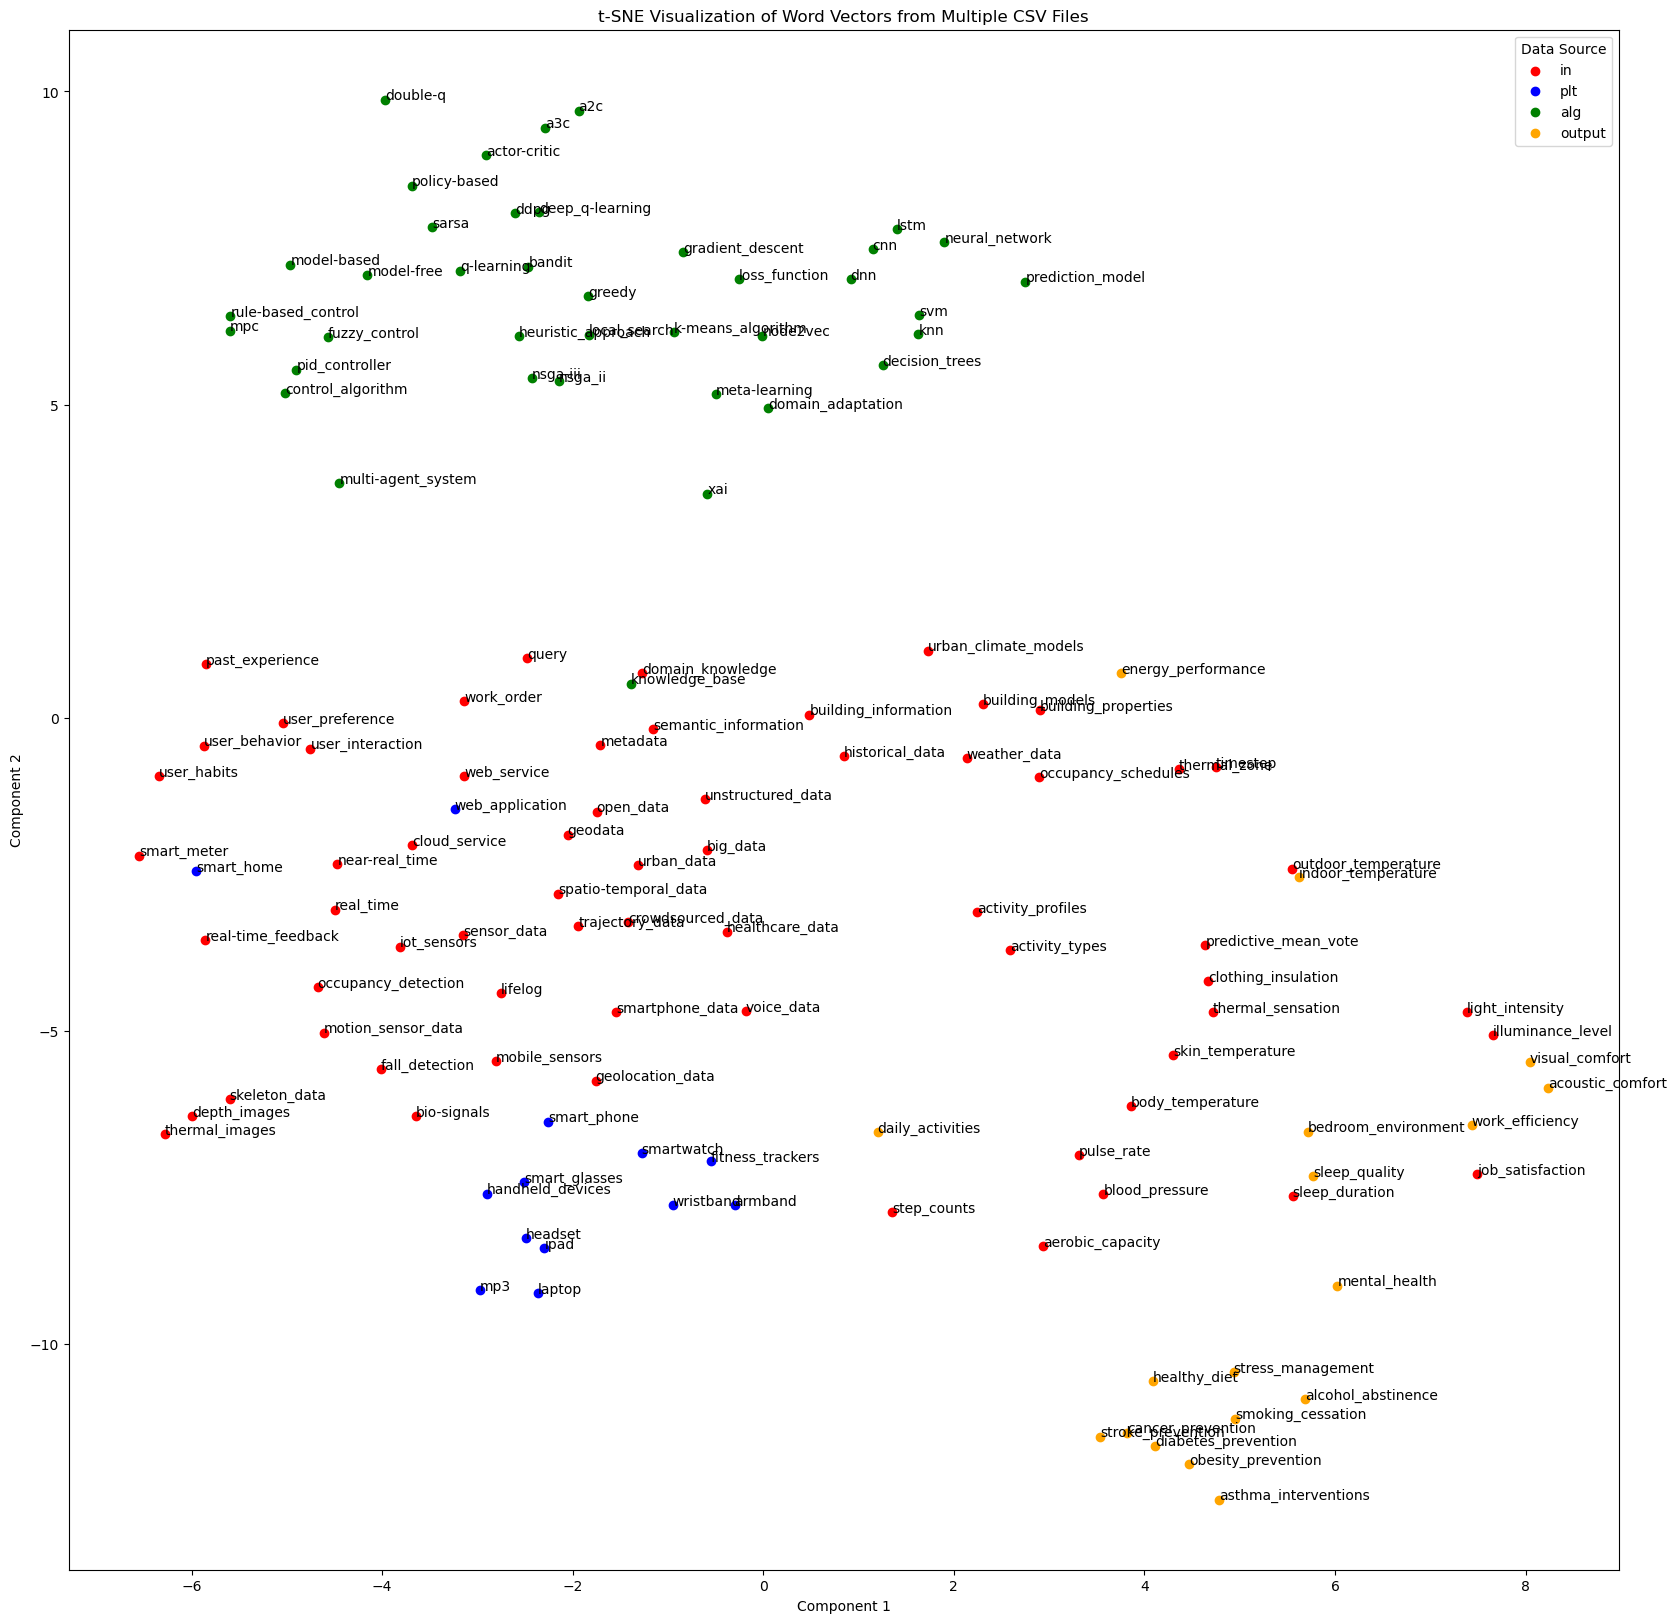

In [4]:
# Define colors for each file's data points
colors = ['red', 'blue', 'green', 'orange']

# Initialize lists to hold embeddings and labels
all_embeddings = []
all_labels = []
all_colors = []
all_file_labels = []

for file_index, csv_file in enumerate(csv_files):
    df = pd.read_csv(csv_file, header=None)  # Assuming there's no header

    # Prepare data for plotting
    labels = []
    embeddings = []

    for index, row in df.iterrows():
        # Split words in the row and check if they are in the model
        words = row[0].split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]

        # Calculate the average vector if there are valid vectors
        if word_vectors:
            average_vector = np.mean(word_vectors, axis=0)  # Ensure it's a numpy array before averaging
            embeddings.append(average_vector)
            labels.append(words[0])  # Using the first word of each row as the label for the plot

    # Extract the label for the file
    file_label = os.path.splitext(os.path.basename(csv_file))[0].split('_')[-1]

    # Add the embeddings, labels, and file labels to the main lists
    all_embeddings.extend(embeddings)
    all_labels.extend(labels)
    all_colors.extend([colors[file_index]] * len(embeddings))
    all_file_labels.extend([file_label] * len(embeddings))

# Ensure there are embeddings to process
if all_embeddings:
    # Convert embeddings to a numpy array for t-SNE
    all_embeddings = np.array(all_embeddings)

    # Use t-SNE to reduce dimensions
    tsne = TSNE(n_components=2, metric='cosine', init='pca')
    mapped_embeddings = tsne.fit_transform(all_embeddings)

    # Plotting
    plt.figure(figsize=(20, 20))
    unique_file_labels = set(all_file_labels)
    for file_label in unique_file_labels:
        indices = [i for i, fl in enumerate(all_file_labels) if fl == file_label]
        color = colors[list(unique_file_labels).index(file_label)]
        plt.scatter(mapped_embeddings[indices, 0], mapped_embeddings[indices, 1], label=file_label, color=color)

    # Annotate each point with the label
    for i, label in enumerate(all_labels):
        plt.annotate(label, (mapped_embeddings[i, 0], mapped_embeddings[i, 1]))

    plt.title('t-SNE Visualization of Word Vectors from Multiple CSV Files')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend(title='Data Source')

    # Save the plot
    save_path = '/Users/77y2vec/Desktop/first_paper_code/results/tsne_plot.png'
    plt.savefig(save_path)
    plt.show()
else:
    print("No valid embeddings found for t-SNE visualization.")